In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

In [2]:
data_1 = pd.read_excel('time_stamp_mean_data.xlsx')

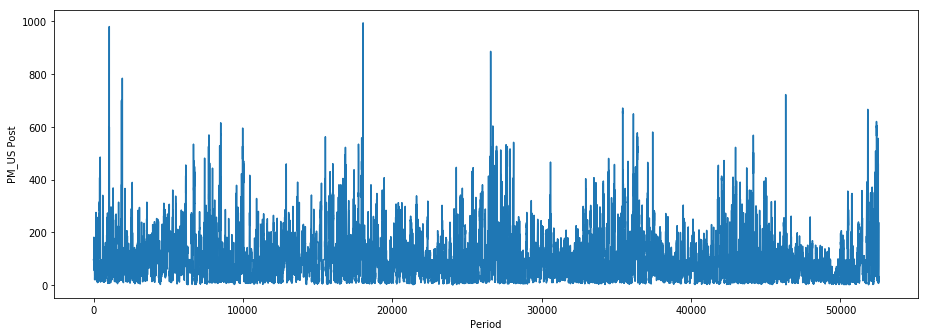

In [3]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(data_1['PM_US Post']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM_US Post')
#plt.title('String Title Here')
plt.show()

In [4]:
X = data_1['PM_US Post']

In [5]:
train , test = X.values[:40000], X.values[40000:]

## Model

In [6]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [8]:
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

In [9]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=29.687313, expected=38.000000
predicted=36.390916, expected=45.000000
predicted=43.094520, expected=44.000000
predicted=42.136862, expected=55.000000
predicted=52.671096, expected=61.000000
predicted=58.417042, expected=69.000000
predicted=66.078303, expected=69.000000
predicted=66.078303, expected=72.000000
predicted=68.951276, expected=87.000000
predicted=83.316141, expected=91.000000


In [10]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 501.084


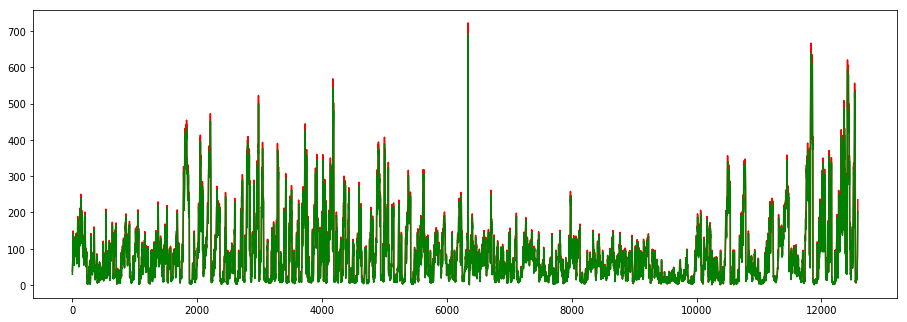

In [11]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(test, color='red')
plt.plot(predictions, color='green')
plt.show()